In [64]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import math as mt

In [65]:
df = pd.read_csv('fish.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Taxon       264 non-null    object 
 1   Habitat     261 non-null    object 
 2   Diet        263 non-null    object 
 3   Bodyweight  264 non-null    float64
 4   BMR         264 non-null    float64
dtypes: float64(2), object(3)
memory usage: 11.8+ KB


In [66]:
bodyweight_data = df['Bodyweight']
print(bodyweight_data)

0      3410.0
1       690.0
2        14.5
3      1350.0
4         9.4
        ...  
295       NaN
296       NaN
297       NaN
298       NaN
299       NaN
Name: Bodyweight, Length: 300, dtype: float64


In [67]:
df.describe()

,Bodyweight,BMR
count,2.640000e+02,264.000000
mean,1.144619e+05,1.247652
std,1.679989e+06,1.854111
min,2.500000e+00,0.070000
25%,3.875000e+01,0.360000
50%,2.320000e+02,0.795000
75%,3.275000e+03,1.450000
max,2.730000e+07,15.480000


In [68]:
# Exclude NaN values from the 'BMR' column
BMR_data = df['BMR'].dropna()

# Calculating the mean of the 'BMR' column
mean_BMR = BMR_data.mean()
median_BMR = BMR_data.median()
mode_BMR = BMR_data.mode()

# Print the mean
print("Mean BMR:", mean_BMR), '\n'
print("Median BMR:", median_BMR), '\n'
print("Mode BMR: \n", mode_BMR)
print("Max BMR:", BMR_data.max())

Mean BMR: 1.247651515151515
Median BMR: 0.795
Mode BMR: 
 0    0.45
Name: BMR, dtype: float64
Max BMR: 15.48


In [69]:
# Exclude NaN values from the 'BMR' column
Bodyweight_data = df['Bodyweight'].dropna()

# Calculating the mean of the 'BMR' column
mean_BMR = Bodyweight_data.mean()
median_BMR = Bodyweight_data.median()
mode_BMR = Bodyweight_data.mode()

# Print the mean
print("Mean BW:", mean_BMR), '\n'
print("Median BW:", median_BMR), '\n'
print("Mode BW: \n", mode_BMR)
print("Max BW:", Bodyweight_data.max())

Mean BW: 114461.88598484849
Median BW: 232.0
Mode BW: 
 0    22.0
1    70.0
Name: Bodyweight, dtype: float64
Max BW: 27300000.0


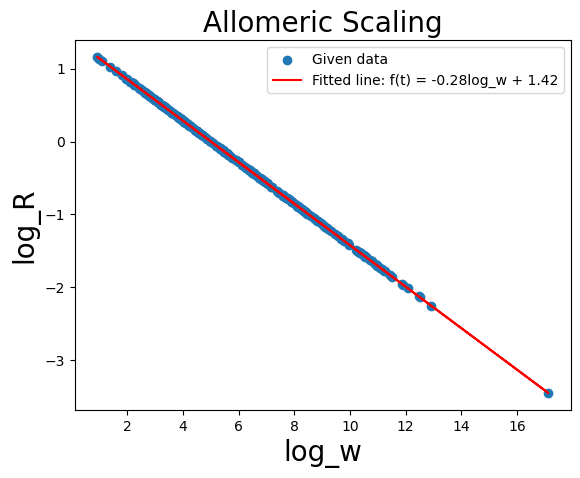

Slope of the fitted line: -0.28
Intercept of the fitted line: 1.42


In [70]:
from sklearn.linear_model import LinearRegression

R = np.array(BMR_data) # defining BMW
w = np.array(Bodyweight_data) #defining Bodyweight

log_R = np.log(R)
log_w = np.log(w)

log_w = log_w.reshape(-1,1) # Converting log_R to column vector

# Create a linear regression model
model = LinearRegression() 

# Fit the model to the data
model.fit(log_w, log_R)

# Get the coefficients of the fitted line
A = model.coef_[0] # slope
B = model.intercept_ # intercept

# Predict the values using the fitted model
predicted_R = model.predict(log_w)

# Plot the data and fitted line
plt.scatter(log_w, predicted_R, label='Given data')
plt.plot(log_w, predicted_R, label=f'Fitted line: f(t) = {A:.2f}log_w + {B:.2f}', color='red')
plt.xlabel('log_w',fontsize=20)
plt.ylabel('log_R',fontsize=20)
plt.title('Allomeric Scaling',fontsize=20)
plt.legend()
plt.savefig("growth.png")
plt.show()

print(f"Slope of the fitted line: {A:.2f}")
print(f"Intercept of the fitted line: {B:.2f}")

In [71]:
# Finding fitting parameters A & B

Intercept = 1.42
Slope = -0.28
A = mt.exp(Intercept)
print("A", A)
print("B", Slope)

A 4.137120440251392
B -0.28


In [72]:
terrestrial_data = df[df['Habitat'] == 'Terrestrial']
aquatic_data = df[df['Habitat'] == 'Aquatic']
arboreal_data = df[df['Habitat'] == 'Arboreal']

In [73]:
terrestrial_data

,Taxon,Habitat,Diet,Bodyweight,BMR
0,Tachyglossusaculeatus,Terrestrial,Invertebrates,3410.0,0.17
3,Didelphismarsupialis,Terrestrial,Omnivorous,1350.0,0.45
4,Planigalegilesi,Terrestrial,Invertebrates,9.4,1.40
5,Planigaleingrami,Terrestrial,Invertebrates,7.1,1.59
6,Planigalemaculatus,Terrestrial,Invertebrates,8.5,1.26
...,...,...,...,...,...
259,Lepustimidus,Terrestrial,Grass,3004.0,0.36
260,Sylvilagusaudubonii,Terrestrial,Grass,702.0,0.63
261,Elephantulusedwardii,Terrestrial,Invertebrates,50.0,1.09
262,Elephantulusrugescens,Terrestrial,Invertebrates,53.0,1.07


In [80]:
t_bmr = terrestrial_data['BMR']
a_bmr = aquatic_data['BMR']
ar_bmr = arboreal_data['BMR']


In [81]:
t_bw = terrestrial_data['Bodyweight']
a_bw = aquatic_data['Bodyweight']
ar_bw = arboreal_data['Bodyweight']

In [82]:
t_bmr

0      0.17
3      0.45
4      1.40
5      1.59
6      1.26
       ... 
259    0.36
260    0.63
261    1.09
262    1.07
263    0.61
Name: BMR, Length: 175, dtype: float64

In [83]:
t_bw

0      3410.0
3      1350.0
4         9.4
5         7.1
6         8.5
        ...  
259    3004.0
260     702.0
261      50.0
262      53.0
263     210.0
Name: Bodyweight, Length: 175, dtype: float64

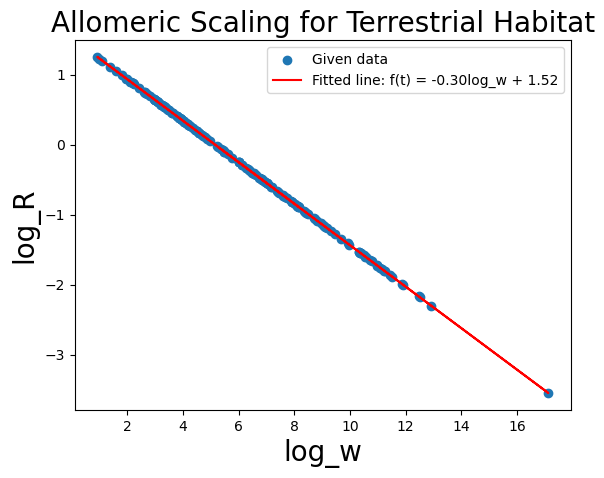

Slope of the fitted line: -0.30
Intercept of the fitted line: 1.52


In [85]:
#For Terrestrial Data

from sklearn.linear_model import LinearRegression

R = np.array(t_bmr) # defining BMW
w = np.array(t_bw) #defining Bodyweight

log_R = np.log(R)
log_w = np.log(w)

log_w = log_w.reshape(-1,1) # Converting log_R to column vector

# Create a linear regression model
model = LinearRegression() 

# Fit the model to the data
model.fit(log_w, log_R)

# Get the coefficients of the fitted line
A = model.coef_[0] # slope
B = model.intercept_ # intercept

# Predict the values using the fitted model
predicted_R = model.predict(log_w)

# Plot the data and fitted line
plt.scatter(log_w, predicted_R, label='Given data')
plt.plot(log_w, predicted_R, label=f'Fitted line: f(t) = {A:.2f}log_w + {B:.2f}', color='red')
plt.xlabel('log_w',fontsize=20)
plt.ylabel('log_R',fontsize=20)
plt.title('Allomeric Scaling for Terrestrial Habitat',fontsize=20)
plt.legend()
plt.savefig("growth.png")
plt.show()

print(f"Slope of the fitted line: {A:.2f}")
print(f"Intercept of the fitted line: {B:.2f}")

In [93]:
# Finding fitting parameters A & B

Intercept = 1.52
Slope = -0.30
t_A = mt.exp(Intercept)
print("A", t_A)
print("B", Slope)

A 4.572225195142159
B -0.3


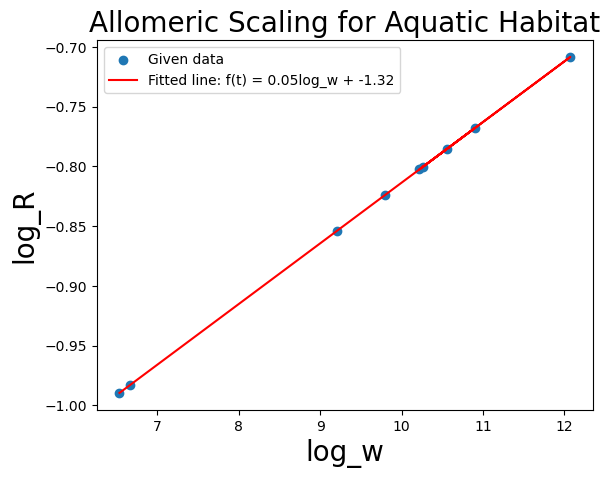

Slope of the fitted line: 0.05
Intercept of the fitted line: -1.32


In [92]:
#For Aquatic Data

from sklearn.linear_model import LinearRegression

R = np.array(a_bmr) # defining BMW
w = np.array(a_bw) #defining Bodyweight

log_R = np.log(R)
log_w = np.log(w)

log_w = log_w.reshape(-1,1) # Converting log_R to column vector

# Create a linear regression model
model = LinearRegression() 

# Fit the model to the data
model.fit(log_w, log_R)

# Get the coefficients of the fitted line
A = model.coef_[0] # slope
B = model.intercept_ # intercept

# Predict the values using the fitted model
predicted_R = model.predict(log_w)

# Plot the data and fitted line
plt.scatter(log_w, predicted_R, label='Given data')
plt.plot(log_w, predicted_R, label=f'Fitted line: f(t) = {A:.2f}log_w + {B:.2f}', color='red')
plt.xlabel('log_w',fontsize=20)
plt.ylabel('log_R',fontsize=20)
plt.title('Allomeric Scaling for Aquatic Habitat',fontsize=20)
plt.legend()
plt.savefig("growth.png")
plt.show()

print(f"Slope of the fitted line: {A:.2f}")
print(f"Intercept of the fitted line: {B:.2f}")

In [94]:
# Finding fitting parameters A & B

Intercept = -1.32
Slope = 0.05
a_A = mt.exp(Intercept)
print("A", a_A)
print("B", Slope)

A 0.26713530196585034
B 0.05


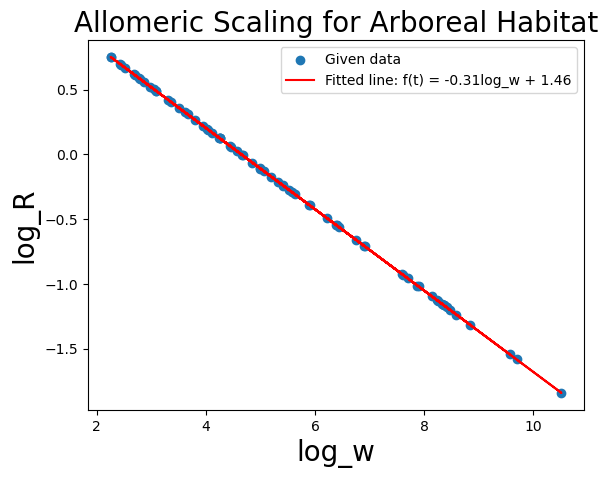

Slope of the fitted line: -0.31
Intercept of the fitted line: 1.46


In [91]:
#For Arboreal Data

from sklearn.linear_model import LinearRegression

R = np.array(ar_bmr) # defining BMW
w = np.array(ar_bw) #defining Bodyweight

log_R = np.log(R)
log_w = np.log(w)

log_w = log_w.reshape(-1,1) # Converting log_R to column vector

# Create a linear regression model
model = LinearRegression() 

# Fit the model to the data
model.fit(log_w, log_R)

# Get the coefficients of the fitted line
A = model.coef_[0] # slope
B = model.intercept_ # intercept

# Predict the values using the fitted model
predicted_R = model.predict(log_w)

# Plot the data and fitted line
plt.scatter(log_w, predicted_R, label='Given data')
plt.plot(log_w, predicted_R, label=f'Fitted line: f(t) = {A:.2f}log_w + {B:.2f}', color='red')
plt.xlabel('log_w',fontsize=20)
plt.ylabel('log_R',fontsize=20)
plt.title('Allomeric Scaling for Arboreal Habitat',fontsize=20)
plt.legend()
plt.savefig("growth.png")
plt.show()

print(f"Slope of the fitted line: {A:.2f}")
print(f"Intercept of the fitted line: {B:.2f}")

In [95]:
# Finding fitting parameters A & B

Intercept = 1.46
Slope = -0.31
ar_A = mt.exp(Intercept)
print("A", t_A)
print("B", Slope)

A 4.572225195142159
B -0.31
